# 比较、掩码和布尔逻辑(Comparisons, Masks, and Boolean Logic)
这一节将会介绍如何用布尔掩码来查看和操作NumPy 数组中的值。当你想基于某些准则
来抽取、修改、计数或对一个数组中的值进行其他操作时，掩码就可以派上用场了。例如
你可能希望统计数组中有多少值大于某一个给定值，或者删除所有超出某些门限值的异常
点。在NumPy 中，布尔掩码通常是完成这类任务的最高效方式。

## 示例：统计下雨天数
假设你有一系列表示某城市一年内日降水量的数据，这里将用Pandas加载2014 年西雅图市的日降水统计数据：

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 利用Pandas抽取降雨量，放入一个NumPy数组
rainfall = pd.read_csv(r'./data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

这个数组包含365 个值，给出了从2014 年1 月1 日至2014 年12 月31 日每天的降水量。
这里降水量的单位是英寸。
首先做一个快速的可视化，用Matplotlib生成下雨天数的
直方图，如图 所示：

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

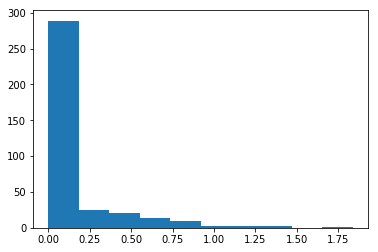

In [4]:
plt.hist(inches)
plt.show()

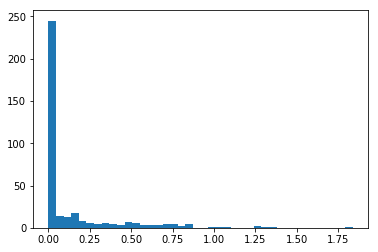

In [5]:
plt.hist(inches,40)
plt.show()

该直方图表明了这些数据的大意：尽管人们对西雅图市有刻板印象，但是2014 年它大多
数时间的降水量都是接近0 的。但是这样做并没有很好地传递出我们希望看到的某些信
息，例如一年中有多少天在下雨，这些下雨天的平均降水量是多少，有多少天的降水量超
过了半英寸？

深入数据

回答以上问题的一种方法是通过传统的统计方式，即对所有数据循环，当碰到数据落在
我们希望的区间时计数器便加1。这种方法在本章节中多次讨论过，但无论从编写代码的
角度看，还是从计算结果的角度看，这都是一种浪费时间、非常低效的方法。我们从已经了解到，NumPy 的通用函数可以用来替代循环，以快速实现数组的逐元素（elementwise）
运算。同样，我们也可以用其他通用函数实现数组的逐元素比较，然后利用计算结果
回答之前提出的问题。先将数据放在一边，来介绍一下NumPy 中有哪些用掩码来快速回
答这类问题的通用工具。

## 和通用函数类似的比较操作

之前介绍了通用函数，并且特别关注了算术运算符。我们看到用+、-、*、/ 和其他一些
运算符实现了数组的逐元素操作。NumPy 还实现了如<（小于）和>（大于）的逐元素比
较的通用函数。这些比较运算的结果是一个布尔数据类型的数组。一共有6 种标准的比较
操作：

In [6]:
x = np.array([1, 2, 3, 4, 5])

In [7]:
x < 3 # 小于

array([ True,  True, False, False, False])

In [8]:
x > 3 # 大于

array([False, False, False,  True,  True])

In [9]:
x <= 3 # 小于等于

array([ True,  True,  True, False, False])

In [10]:
x >= 3 # 大于等于

array([False, False,  True,  True,  True])

In [11]:
x != 3 # 不等于

array([ True,  True, False,  True,  True])

In [12]:
x == 3 # 等于

array([False, False,  True, False, False])

另外，利用复合表达式实现对两个数组的逐元素比较也是可行的：

In [13]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

和算术运算符一样，比较运算操作在NumPy 中也是借助通用函数来实现的。例如当你写
x < 3 时，NumPy 内部会使用np.less(x, 3)。这些比较运算符和其对应的通用函数如下
表所示。

| 运算符 | 对应的通用函数   |
| ------ | ---------------- |
| ==     | np.equal         |
| !=     | np.not_equal     |
| <      | np.less          |
| <=     | np.less_equal    |
| >      | np.greater       |
| >=     | np.greater_equal |

和算术运算通用函数一样，这些比较运算通用函数也可以用于任意形状、大小的数组。下
面是一个二维数组的示例：

In [14]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [15]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

这样每次计算的结果都是布尔数组了。NumPy 提供了一些简明的模式来操作这些布尔
结果。

## 操作布尔数组

给定一个布尔数组，你可以实现很多有用的操作。首先打印出此前生成的二维数组x：

In [16]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

#### 1. 统计记录的个数

如果需要统计布尔数组中True 记录的个数，可以使用np.count_nonzero 函数：

In [17]:
# 有多少值小于6？
np.count_nonzero(x < 6)

8

我们看到有8 个数组记录是小于6 的。另外一种实现方式是利用np.sum。在这个例子中，
False 会被解释成0，True 会被解释成1：

In [18]:
np.sum(x < 6)

8

sum() 的好处是，和其他NumPy 聚合函数一样，这个求和也可以沿着行或列进行：

In [19]:
# 每行有多少值小于6？
np.sum(x < 6, axis=1)

array([4, 2, 2])

这是矩阵中每一行小于6 的个数。

如要快速检查任意或者所有这些值是否为True，可以用（你一定猜到了）np.any() 或
np.all()：

In [20]:
# 有没有值大于8？
np.any(x > 8)

True

In [21]:
# 有没有值小于0？
np.any(x < 0)

False

In [22]:
# 是否所有值都小于10？
np.all(x < 10)

True

In [23]:
# 是否所有值都等于6？
np.all(x == 6)

False

np.all() 和np.any() 也可以用于沿着特定的坐标轴，例如：

In [24]:
# 是否每行的所有值都小于8？
np.all(x < 8, axis=1)

array([ True, False,  True])

这里第1 行和第3 行的所有元素都小于8，而第2 行不是所有元素都小于8。

最后需要提醒的是，Python 有内置的sum()、any() 和all() 函数，
这些函数在NumPy 中有不同的语法版本。如果在多维数组上混用这两个版本，会导致失
败或产生不可预知的错误结果。因此，确保在以上的示例中用的都是np.sum()、np.any()
和np.all() 函数。

#### 2. 布尔运算符
我们已经看到该如何统计所有降水量小于4 英寸或者大于2 英寸的天数，但是如果我们想
统计降水量小于4 英寸且大于2 英寸的天数该如何操作呢？这可以通过Python 的逐位逻辑
运算符（bitwise logic operator）&、|、^ 和~ 来实现。同标准的算术运算符一样，NumPy
用通用函数重载了这些逻辑运算符，这样可以实现数组的逐位运算（通常是布尔运算）。
例如，可以写如下的复合表达式：

In [25]:
np.sum((inches > 0.5) & (inches < 1))

29

可以看到，降水量在0.5 英寸~1 英寸间的天数是29 天。
请注意，这些括号是非常重要的，因为有运算优先级规则。如果去掉这些括号，该表达式
会变成以下形式，这会导致运行错误：

    inches > (0.5 & inches) < 1

利用A AND B 和NOT (A OR B) 的等价原理（你应该在基础逻辑课程中学习过），可以用
另外一种形式实现同样的结果：

In [26]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

将比较运算符和布尔运算符合并起来用在数组上，可以实现更多有效的逻辑运算操作。
以下表格总结了逐位的布尔运算符和其对应的通用函数。

| 运算符 | 对应通用函数   |
| ------ | -------------- |
| &      | np.bitwise_and |
| `|`    | `np.bitwise_or`  |
| ^      | np.bitwise_xor |
| ~      | np.bitwise_not |


利用这些工具，就可以回答那些关于天气数据的问题了。以下的示例是结合使用掩码和聚
合实现的结果计算：

In [27]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) &
(inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


## 将布尔数组作为掩码
在前面的小节中，我们看到了如何直接对布尔数组进行聚合计算。一种更强大的模式是使
用布尔数组作为掩码，通过该掩码选择数据的子数据集。以前面小节用过的x 数组为例，
假设我们希望抽取出数组中所有小于5 的元素：

In [28]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

如前面介绍过的方法，利用比较运算符可以得到一个布尔数组：

In [29]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

现在为了将这些值从数组中选出，可以进行简单的索引，即掩码操作：

In [30]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [31]:
x[:,0] < 5

array([False, False,  True])

In [32]:
#这个类似于花式索引了
x[x[:,0] < 5]

array([[2, 4, 7, 6]])

将布尔数组作为掩码返回的是包含了所有满足条件的值。换句话说，所有的这些值是掩
码数组对应位置为True 的值。

现在，可以对这些值做任意操作，例如可以根据西雅图降水数据进行一些相关统计：

In [33]:
# 为所有下雨天创建一个掩码
rainy = (inches > 0)

# 构建一个包含整个夏季日期的掩码（6月21日是第172天）
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

print("Median precip on rainy days in 2014 (inches): ",
np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ",
np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


通过将布尔操作、掩码操作和聚合结合，可以快速回答对数据集提出的这类问题。

人们经常困惑于关键字and 和or，以及逻辑操作运算符& 和| 的区别是什么，什么时
候该选择哪一种？

它们的区别是：and 和or 判断整个对象是真或假，而& 和| 是指每个对象中的比特位。
当你使用and 或or 时，就等于让Python 将这个对象当作整个布尔实体。在Python 中，
所有非零的整数都会被当作是True：